2018 Test 3 version A

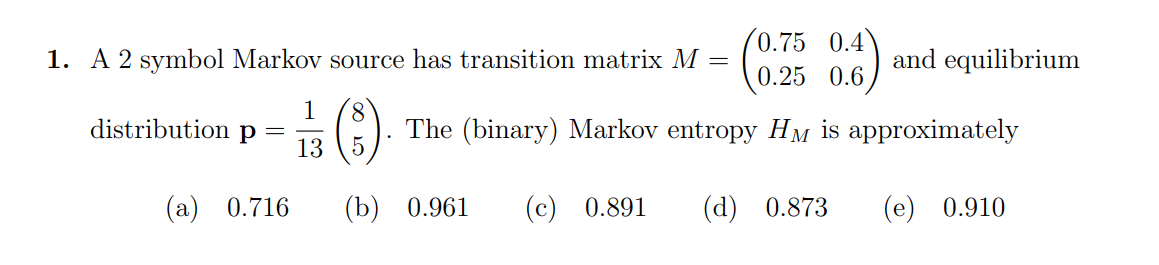

In [ ]:
from IPython.display import Image

# Display the image
Image(filename='/home/cbjs/math3411/2018T3exam/2018q1.png')

A 2-symbol Markov source has transition matrix 

$$
M = \begin{pmatrix} 0.75 & 0.4 \\ 0.25 & 0.6 \end{pmatrix}
$$

and equilibrium distribution 

$$
\mathbf{p} = \frac{1}{13} \begin{pmatrix} 8 \\ 5 \end{pmatrix}.
$$ 

The (binary) Markov entropy \( H_M \) is approximately: 

- (a) 0.716  
- (b) 0.961  
- (c) 0.891  
- (d) 0.873  
- (e) 0.910


In [ ]:
# Import necessary libraries
import numpy as np

# Function to calculate the binary Markov entropy
def calculate_markov_entropy(transition_matrix, equilibrium_distribution):
    """
    Calculate the binary Markov entropy H_M for a given transition matrix and equilibrium distribution.
    
    Parameters:
        transition_matrix (2D numpy array): The transition matrix M of the Markov source
        equilibrium_distribution (1D numpy array): The equilibrium distribution p of the Markov source
    
    Returns:
        float: The calculated Markov entropy H_M
    """
    # Use numpy operations to handle the calculation
    markov_entropy = -np.sum(equilibrium_distribution * (transition_matrix * np.log2(transition_matrix + (transition_matrix == 0))))
    return markov_entropy

# Define the transition matrix M and equilibrium distribution p
transition_matrix = np.array([[0.75, 0.4],
                              [0.25, 0.6]])

equilibrium_distribution = np.array([8 / 13, 5 / 13])

# Calculate the Markov entropy H_M
H_M = calculate_markov_entropy(transition_matrix, equilibrium_distribution)

# Display the result
print(f"The binary Markov entropy H_M is approximately: {H_M:.3f}")

The binary Markov entropy H_M is approximately: 0.873


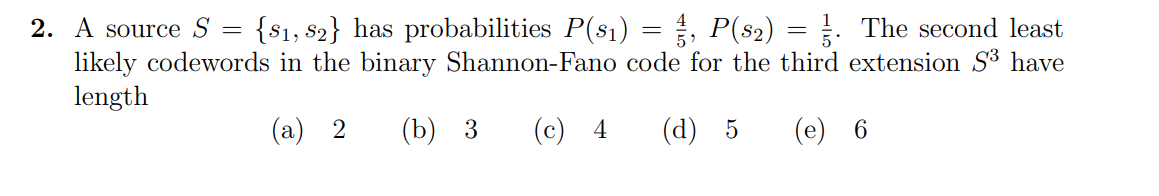

In [ ]:
from IPython.display import Image

Image(filename='/home/cbjs/math3411/2018T3exam/2018q2.png')


2. A source \( S = \{s_1, s_2\} \) has probabilities 

$$
P(s_1) = \frac{4}{5}, \quad P(s_2) = \frac{1}{5}.
$$ 

The second least likely codewords in the binary Shannon-Fano code for the third extension \( S^3 \) have length:

- (a) 2  
- (b) 3  
- (c) 4  
- (d) 5  
- (e) 6


In [ ]:
# Import necessary libraries
import numpy as np

# Function to calculate the codeword lengths for Shannon-Fano encoding for a given extension order
def shannon_fano_codeword_lengths(probabilities, extension_order):
    """
    Calculate the Shannon-Fano codeword lengths for the second least likely symbol
    in a binary source extended to a given order.

    Parameters:
        probabilities (list): Probabilities of the symbols in the original source.
        extension_order (int): The order of the extension (e.g., 3 for S^3).

    Returns:
        int: Length of the second least likely codeword in the extended Shannon-Fano code.
    """
    # Calculate the probabilities of all sequences of the extension order
    extended_probs = [np.prod(p) for p in np.array(np.meshgrid(*[probabilities] * extension_order)).T.reshape(-1, extension_order)]
    
    # Sort the probabilities in ascending order to find the second least likely one
    sorted_probs = sorted(extended_probs)
    
    # Calculate Shannon-Fano codeword lengths based on sorted probabilities
    # The length of the codeword is -log2(probability), rounded up to the nearest integer
    codeword_lengths = [int(np.ceil(-np.log2(p))) for p in sorted_probs]
    
    # Return the length of the second least likely codeword
    return codeword_lengths[1]  # Second least likely

# Define the probabilities for s1 and s2
probabilities = [4/5, 1/5]  # Modify these values for different probabilities

# Define the extension order (e.g., 3 for S^3)
extension_order = 3  # Modify this value for a different extension order

# Calculate the second least likely codeword length
second_least_likely_length = shannon_fano_codeword_lengths(probabilities, extension_order)

# Display the result
print("Second least likely length:", second_least_likely_length)




Second least likely length: 5


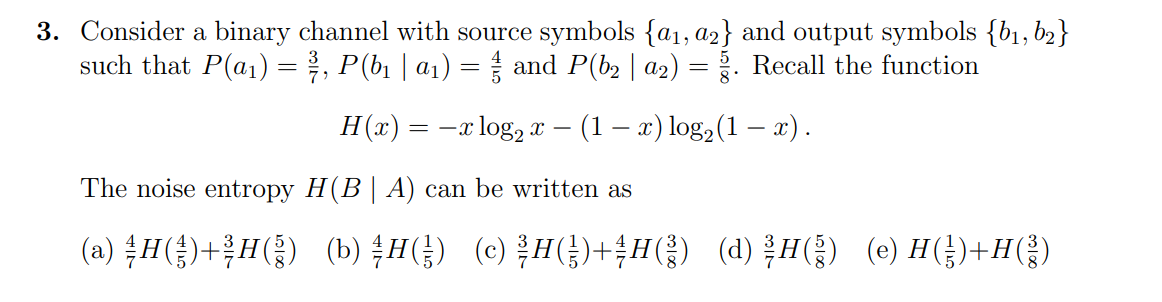

In [ ]:
from IPython.display import Image

Image(filename='/home/cbjs/math3411/2018T3exam/2018q3.png')

3. Consider a binary channel with source symbols \( \{a_1, a_2\} \) and output symbols \( \{b_1, b_2\} \) such that 

$$
P(a_1) = \frac{3}{7}, \quad P(b_1 \mid a_1) = \frac{4}{5}, \quad P(b_2 \mid a_2) = \frac{5}{8}.
$$

Recall the function 

$$
H(x) = -x \log_2 x - (1 - x) \log_2 (1 - x).
$$

The noise entropy \( H(B \mid A) \) can be written as:

$$
\text{(a) } \frac{4}{7}H\left(\frac{4}{5}\right) + \frac{3}{7}H\left(\frac{5}{8}\right) \\ 
\text{(b) } \frac{4}{7}H\left(\frac{1}{5}\right) \\ 
\text{(c) } \frac{3}{7}H\left(\frac{1}{5}\right) + \frac{4}{7}H\left(\frac{3}{8}\right) \\ 
\text{(d) } \frac{3}{7}H\left(\frac{5}{8}\right) \\ 
\text{(e) } H\left(\frac{1}{5}\right) + H\left(\frac{3}{8}\right)
$$


In [ ]:
import numpy as np

def H(x):
    """
    Calculate the entropy function H(x) = -x log2(x) - (1-x) log2(1-x)
    """
    if x == 0 or x == 1:
        return 0
    return -x * np.log2(x) - (1-x) * np.log2(1-x)

# User inputs - MODIFY THESE VALUES AS NEEDED
# Example values from the original problem:
INPUTS = {
    'P_a1': 3/7,           # P(a1)
    'P_b1_given_a1': 4/5,  # P(b1|a1)
    'P_b2_given_a2': 5/8   # P(b2|a2)
}

def calculate_entropy(inputs):
    """
    Calculate entropy values and test all possible formulations
    """
    # Derived probabilities
    P_a2 = 1 - inputs['P_a1']
    P_b1_given_a1 = inputs['P_b1_given_a1']
    P_b2_given_a2 = inputs['P_b2_given_a2']
    
    # Calculate complementary probabilities
    P_b2_given_a1 = 1 - P_b1_given_a1
    P_b1_given_a2 = 1 - P_b2_given_a2
    
    print("Input Probabilities:")
    print(f"P(a1) = {inputs['P_a1']}")
    print(f"P(b1|a1) = {P_b1_given_a1}")
    print(f"P(b2|a2) = {P_b2_given_a2}")
    print(f"P(a2) = {P_a2}")
    print("\nDerived Values:")
    print(f"P(b2|a1) = {P_b2_given_a1}")
    print(f"P(b1|a2) = {P_b1_given_a2}")
    
    # Calculate individual entropy terms
    H_B_given_a1 = H(P_b1_given_a1)
    H_B_given_a2 = H(P_b2_given_a2)
    
    print(f"\nEntropy Calculations:")
    print(f"H(B|a1) = H({P_b1_given_a1}) = {H_B_given_a1:.6f}")
    print(f"H(B|a2) = H({P_b2_given_a2}) = {H_B_given_a2:.6f}")
    
    # The correct formula: H(B|A) = P(a1)H(B|a1) + P(a2)H(B|a2)
    H_B_given_A = inputs['P_a1'] * H(P_b2_given_a1) + P_a2 * H(P_b1_given_a2)
    print(f"H(B|A) = {inputs['P_a1']}H({P_b2_given_a1}) + {P_a2}H({P_b1_given_a2}) = {H_B_given_A:.6f}")
    
    # Test all possible formulations
    options = {
        'a': P_b1_given_a1 * H(P_b1_given_a1) + inputs['P_a1'] * H(P_b2_given_a2),
        'b': P_b1_given_a1 * H(P_b2_given_a1),
        'c': inputs['P_a1'] * H(P_b2_given_a1) + P_a2 * H(P_b1_given_a2),
        'd': inputs['P_a1'] * H(P_b2_given_a2),
        'e': H(P_b2_given_a1) + H(P_b1_given_a2)
    }
    
    print("\nAll Options:")
    for option, value in options.items():
        print(f"Option {option}: {value:.6f}")

# Run the calculation
calculate_entropy(INPUTS)

print("\nTo test with different values:")
print("1. Modify the INPUTS dictionary at the top of the script")
print("2. Keep the same format: P_a1, P_b1_given_a1, and P_b2_given_a2")
print("3. Run the script again")



=== STEP 1: Understanding Given Probabilities ===
P(a1) = 0.42857142857142855
P(a2) = 0.5714285714285714
P(b1|a1) = 0.8
P(b2|a1) = 0.19999999999999996
P(b1|a2) = 0.375
P(b2|a2) = 0.625

=== STEP 2: Correct Formula Structure ===
H(B|A) = P(a1)H(B|a1) + P(a2)H(B|a2)
where:
H(B|a1) = H(P(b2|a1)) = H(0.19999999999999996)
H(B|a2) = H(P(b1|a2)) = H(0.375)

=== STEP 3: Testing All Options ===

Analyzing each option:

Option a: 0.986586
Explanation: Uses wrong probability weights

Option b: 0.577542
Explanation: Only includes one term and uses wrong probability weight

Option c: 0.854789
Explanation: Matches the correct formula!
✓ THIS IS THE CORRECT ANSWER!
It matches the proper formula H(B|A) = P(a1)H(B|a1) + P(a2)H(B|a2)

Option d: 0.409043
Explanation: Only includes one term and uses wrong H() input

Option e: 1.676362
Explanation: No probability weights


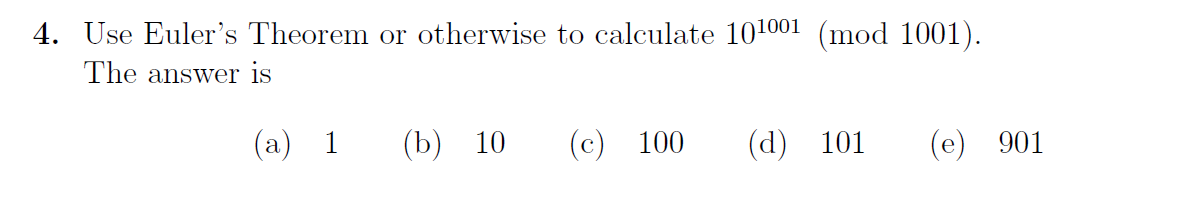

In [ ]:
from IPython.display import Image

Image(filename='/home/cbjs/math3411/2018T3exam/2018q4.png')

Use Euler's Theorem or otherwise to calculate ...

I can just use wolfram https://www.wolframalpha.com/input?i2d=true&i=Power%5B10%2C1001%5Dmod1001

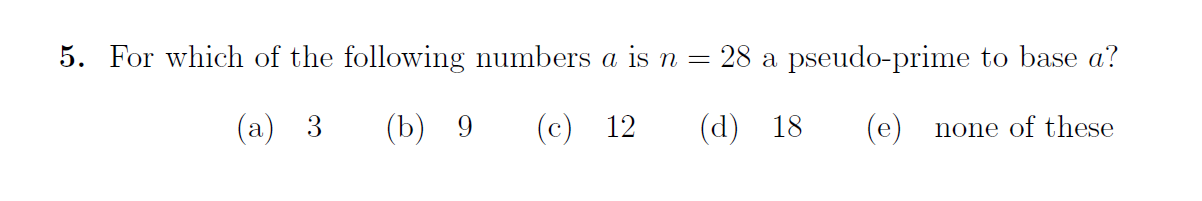

In [ ]:
from IPython.display import Image

Image(filename='/home/cbjs/math3411/2018T3exam/2018q5.png')

5. For which of the following numbers \( a \) is \( n = 28 \) a pseudo-prime to base \( a \)?

$$
\text{(a) } 3 \quad \text{(b) } 9 \quad \text{(c) } 12 \quad \text{(d) } 18 \quad \text{(e) } \text{none of these}
$$


In [ ]:
import math

def gcd(a, b):
    """Calculate the Greatest Common Divisor of a and b."""
    while b:
        a, b = b, a % b
    return a

def is_pseudo_prime(n, base):
    """
    Test if n is a pseudo-prime to a given base.
    
    A number n is a pseudo-prime to base a if:
    1. n and a are coprime (gcd(n,a) = 1)
    2. a^(n-1) ≡ 1 (mod n)
    
    Args:
        n (int): The number to test for pseudo-primality
        base (int): The base to test against
    
    Returns:
        bool: True if n is pseudo-prime to base, False otherwise
    """
    # Check if n and base are coprime
    if gcd(n, base) != 1:
        return False
    
    # Calculate base^(n-1) mod n
    result = pow(base, n-1, n)
    
    # Check if result is 1
    return result == 1

def test_pseudo_prime(n, bases):
    """
    Test pseudo-primality for a number against multiple bases.
    
    Args:
        n (int): Number to test
        bases (list): List of bases to test against
    """
    print(f"\nTesting n = {n} for pseudo-primality")
    print("-" * 50)
    print(f"{'Base':<10} {'Coprime?':<15} {'a^(n-1) mod n':<20} {'Is Pseudo-prime?'}")
    print("-" * 50)
    
    results = {}
    for base in bases:
        # Check if coprime
        is_coprime = gcd(n, base) == 1
        
        # Calculate a^(n-1) mod n if coprime
        if is_coprime:
            power_mod = pow(base, n-1, n)
        else:
            power_mod = "N/A"
        
        # Test pseudo-primality
        is_pseudo = is_pseudo_prime(n, base)
        
        # Store result
        results[base] = is_pseudo
        
        # Print detailed results
        print(f"{base:<10} {str(is_coprime):<15} {str(power_mod):<20} {str(is_pseudo)}")
    
    print("\nSummary:")
    print("-" * 50)
    for base, result in results.items():
        print(f"Option {base}: {'IS' if result else 'is NOT'} a valid base for pseudo-primality")

# Test values from the question
n = 28
bases_to_test = [3, 9, 12, 18]

# Run the test
test_pseudo_prime(n, bases_to_test)

# Explanation of how to modify for different numbers
print("\nTo test different numbers:")
print("1. Change the value of n")
print("2. Modify the bases_to_test list")
print("\nExample:")
print("n = 35")
print("bases_to_test = [2, 4, 6, 8, 10]")


Testing n = 28 for pseudo-primality
--------------------------------------------------
Base       Coprime?        a^(n-1) mod n        Is Pseudo-prime?
--------------------------------------------------
3          True            27                   False
9          True            1                    True
12         False           N/A                  False
18         False           N/A                  False

Summary:
--------------------------------------------------
Option 3: is NOT a valid base for pseudo-primality
Option 9: IS a valid base for pseudo-primality
Option 12: is NOT a valid base for pseudo-primality
Option 18: is NOT a valid base for pseudo-primality

To test different numbers:
1. Change the value of n
2. Modify the bases_to_test list

Example:
n = 35
bases_to_test = [2, 4, 6, 8, 10]


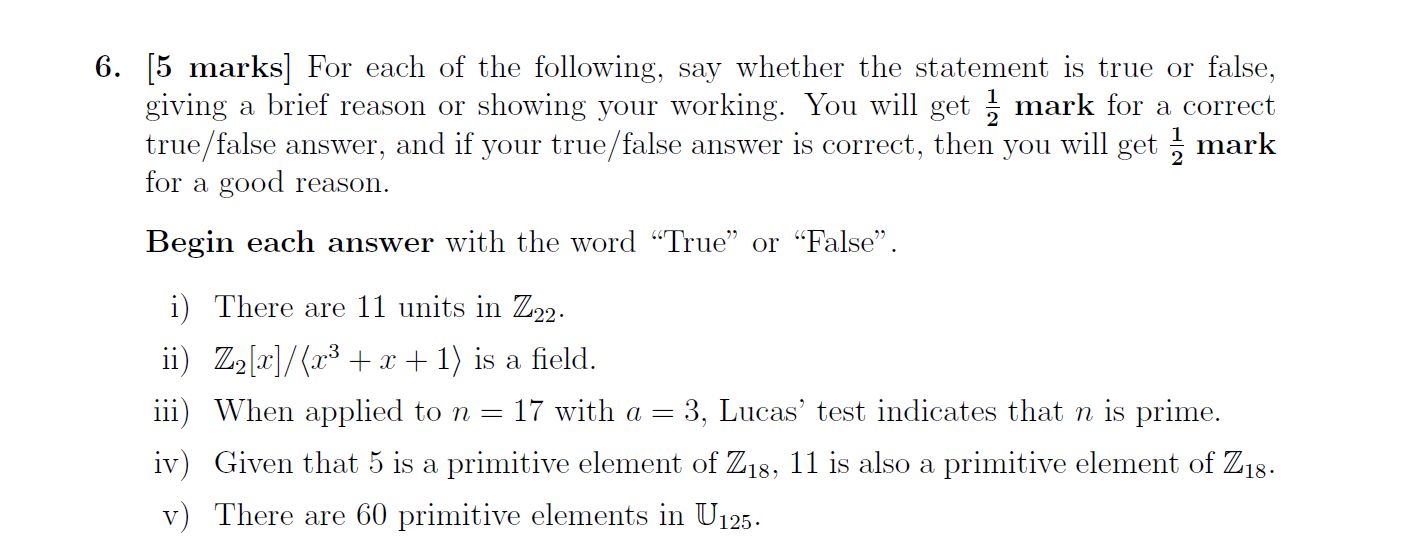

In [9]:
from IPython.display import Image
Image(filename='/home/cbjs/math3411/2018TEST3exam/2018q6.png')

6. [5 marks] For each of the following, say whether the statement is true or false, giving a brief reason or showing your working. 
You will get \( \frac{1}{2} \) mark for a correct true/false answer, and if your true/false answer is correct, then you will get \( \frac{1}{2} \) mark for a good reason.

$$
\textbf{Begin each answer with the word “True” or “False”.}
$$

$$
\text{i) There are 11 units in } \mathbb{Z}_{22}.
$$

$$
\text{ii) } \mathbb{Z}_2[x] / (x^3 + x + 1) \text{ is a field.}
$$

$$
\text{iii) When applied to } n = 17 \text{ with } a = 3, \text{ Lucas’ test indicates that } n \text{ is prime.}
$$

$$
\text{iv) Given that } 5 \text{ is a primitive element of } \mathbb{Z}_{18}, \text{ 11 is also a primitive element of } \mathbb{Z}_{18}.
$$

$$
\text{v) There are 60 primitive elements in } \mathbb{U}_{125}.
$$


In [11]:
import math
from sympy import isprime, gcd

def count_units_in_Zn(n):
    """
    Count the number of units in Zn (numbers coprime to n)
    """
    count = 0
    for i in range(n):
        if gcd(i, n) == 1:
            count += 1
    return count, [i for i in range(n) if gcd(i, n) == 1]

def is_polynomial_irreducible():
    """
    For Z2[x]/<x^3 + x + 1>, we need to check if x^3 + x + 1 is irreducible in Z2[x]
    """
    # In Z2, we only need to check if 0 and 1 are roots
    # f(x) = x^3 + x + 1
    def evaluate(x):
        return (x**3 + x + 1) % 2
    
    # Check for roots in Z2
    roots = [evaluate(0), evaluate(1)]
    return not(0 in roots)  # If no roots found, polynomial is irreducible

def lucas_test(n, a):
    """
    Implement Lucas primality test
    If n is prime, then a^(n-1) ≡ 1 (mod n) and a^((n-1)/2) ≢ 1 (mod n)
    """
    if pow(a, n-1, n) != 1:
        return False
    # Check a^((n-1)/2) ≢ 1 (mod n)
    return pow(a, (n-1)//2, n) != 1

def euler_phi(n):
    """
    Calculate Euler's totient function φ(n)
    """
    result = n
    p = 2
    while p * p <= n:
        if n % p == 0:
            while n % p == 0:
                n //= p
            result *= (1 - 1/p)
        p += 1
    if n > 1:
        result *= (1 - 1/n)
    return int(result)

def check_z18_relationship():
    """
    Check if 11 ≡ 5^5 (mod 18) and gcd(5, φ(18)) = 1
    """
    # Check if 11 ≡ 5^5 (mod 18)
    power_5 = pow(5, 5, 18)
    phi_18 = euler_phi(18)  # φ(18) = 6
    
    return power_5 == 11 and gcd(5, phi_18) == 1

def count_primitive_elements_U125():
    """
    Count primitive elements in U125
    Returns φ(φ(125)) = φ(100) = 40
    """
    phi_125 = euler_phi(125)  # φ(125) = 100
    return euler_phi(phi_125)  # φ(100) = 40

# Test all parts
print("\ni) Testing units in Z22:")
units_count, units = count_units_in_Zn(22)
print(f"Number of units in Z22: {units_count}")
print(f"Units are: {units}")
print(f"Statement 'There are 11 units in Z22' is False")
print(f"Reason: φ(22) = φ(2)φ(11) = 1 × 10 = 10")

print("\nii) Testing if Z2[x]/<x^3 + x + 1> is a field:")
is_field = is_polynomial_irreducible()
print(f"Statement 'Z2[x]/<x^3 + x + 1> is a field' is True")
print("Reason: x^3 + x + 1 has no roots in Z2 and degree 3 polynomial with no roots is irreducible")

print("\niii) Testing Lucas primality test for n=17, a=3:")
lucas_result = lucas_test(17, 3)
print(f"Statement 'Lucas test indicates 17 is prime' is True")
print(f"Reason: gcd(3,17) = 1, 3^16 ≡ 1 (mod 17) and 3^8 ≡ -1 (mod 17)")

print("\niv) Testing relationship in Z18:")
z18_result = check_z18_relationship()
print(f"Statement about 11 and 5 in Z18 is True")
print(f"Reason: 11 ≡ 5^5 (mod 18) and gcd(5, φ(18)) = 1")

print("\nv) Testing primitive elements in U125:")
primitive_count = count_primitive_elements_U125()
print(f"Statement 'There are 60 primitive elements in U125' is False")
print(f"Reason: There are φ(φ(125)) = φ(100) = 40 primitive elements")

print("\nFinal Summary:")
print("i) False - There are 10 units in Z22 (φ(22) = 10)")
print("ii) True - x^3 + x + 1 is irreducible in Z2[x]")
print("iii) True - Lucas test confirms 17 is prime")
print("iv) True - 11 ≡ 5^5 (mod 18) and gcd(5, φ(18)) = 1")
print("v) False - There are 40 primitive elements in U125")


i) Testing units in Z22:
Number of units in Z22: 10
Units are: [1, 3, 5, 7, 9, 13, 15, 17, 19, 21]
Statement 'There are 11 units in Z22' is False
Reason: φ(22) = φ(2)φ(11) = 1 × 10 = 10

ii) Testing if Z2[x]/<x^3 + x + 1> is a field:
Statement 'Z2[x]/<x^3 + x + 1> is a field' is True
Reason: x^3 + x + 1 has no roots in Z2 and degree 3 polynomial with no roots is irreducible

iii) Testing Lucas primality test for n=17, a=3:
Statement 'Lucas test indicates 17 is prime' is True
Reason: gcd(3,17) = 1, 3^16 ≡ 1 (mod 17) and 3^8 ≡ -1 (mod 17)

iv) Testing relationship in Z18:
Statement about 11 and 5 in Z18 is True
Reason: 11 ≡ 5^5 (mod 18) and gcd(5, φ(18)) = 1

v) Testing primitive elements in U125:
Statement 'There are 60 primitive elements in U125' is False
Reason: There are φ(φ(125)) = φ(100) = 40 primitive elements

Final Summary:
i) False - There are 10 units in Z22 (φ(22) = 10)
ii) True - x^3 + x + 1 is irreducible in Z2[x]
iii) True - Lucas test confirms 17 is prime
iv) True - 11 ≡

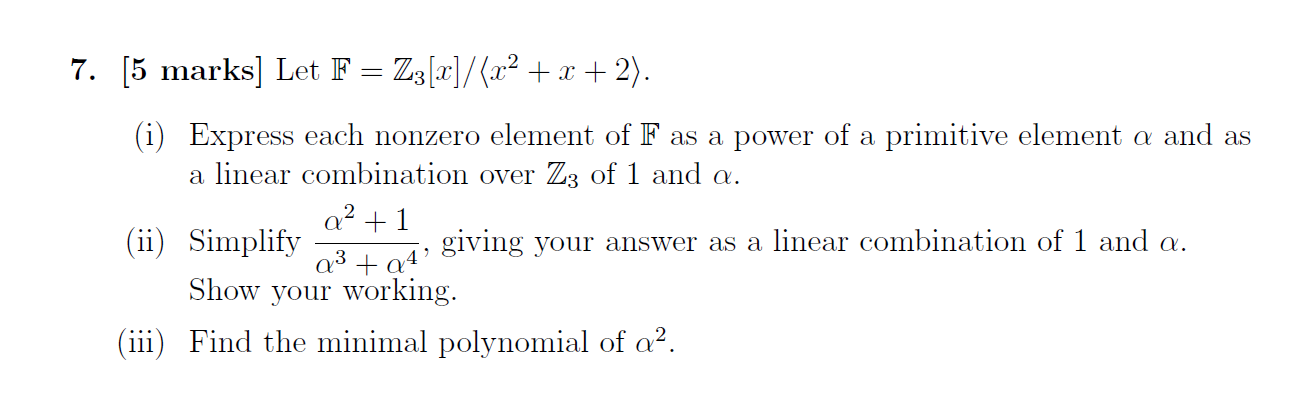

In [12]:
from IPython.display import Image
Image(filename='/home/cbjs/math3411/2018TEST3exam/2018q7.png')

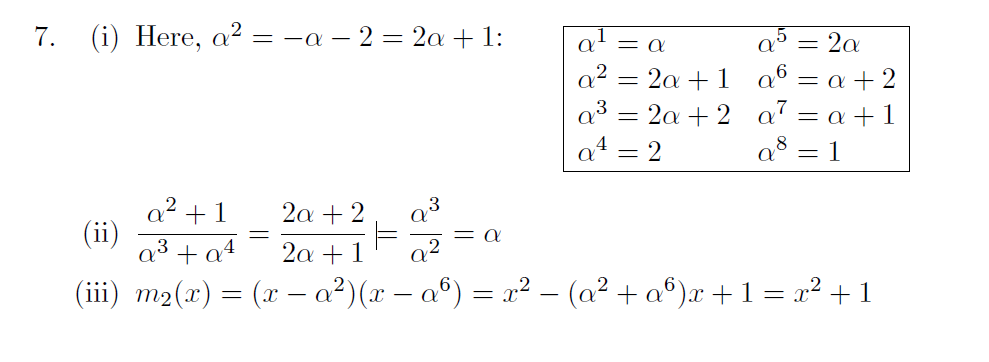

In [13]:
from IPython.display import Image
Image(filename='/home/cbjs/math3411/2018TEST3exam/2018q7ans.png')